In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing math and scipy.stats
import scipy.stats as stats
import math

In [3]:
# Importing insurance data with pd.read_csv
insurance = pd.read_csv('Data/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Q1. Do smokers have higher insurance charges than non-smokers?

1. State your Null Hypothesis and Alternative Hypothesis.

- `H0`: "There is no difference in the average insurance charges between smokers and non-smokers"
- `H1`: "Smokers have higher average insurance charges than non-smokers"

2. Select the correct test according to the data type and number of samples.

In [7]:
smokers = insurance.loc[insurance['smoker'] == 'yes', :]
non_smokers = insurance.loc[insurance['smoker'] == 'no', :]

Text(0.5, 1.0, 'Count of Smokers and Non-Smokers')

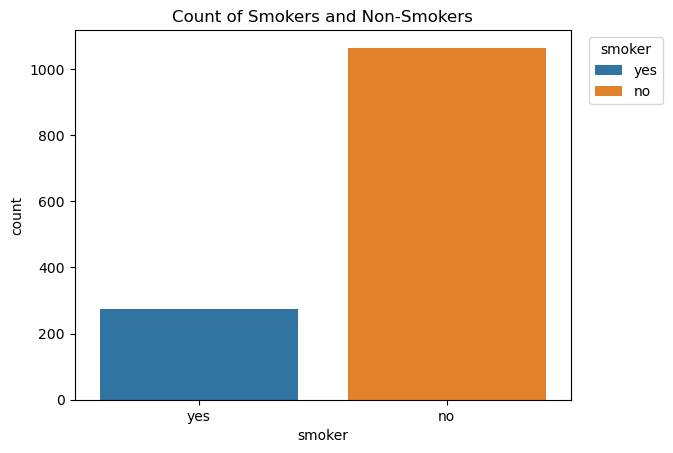

In [18]:
# creating visualization of the data to see a count of smokers and non-smokers
ax = sns.countplot(x='smoker', data=insurance, hue='smoker', dodge=False)
sns.move_legend(ax, loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('Count of Smokers and Non-Smokers')

In [19]:
# Printign the shape of the smokers and non-smokers dataframes
# to see how many observations we have for each
print(smokers.shape)
print(non_smokers.shape)

(274, 7)
(1064, 7)


The data appears to be categorical data. In this case I will be testing this data with categorical hypothesis testing functions. Since this is a binary target and presents a category vs categorical situation. I will be using Chi-Squared module to test the data for the hypothesis.

3. Test the assumptions of your selected test.

In [24]:
# calculating the contingency table with pd.crosstab
table = pd.crosstab(insurance['smoker'], insurance['charges'])
table

charges,1121.87390,1131.50660,1135.94070,1136.39940,1137.01100,1137.46970,1141.44510,1146.79660,1149.39590,1163.46270,...,48885.13561,48970.24760,49577.66240,51194.55914,52590.82939,55135.40209,58571.07448,60021.39897,62592.87309,63770.42801
smoker,,,,,,,,,,,,,,,,,,,,,
no,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
yes,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
